# A Jupyter Notebook to access structures and data from the master worksheet



This notebook demonstates how to get the structures and data from the master worksheet, then convert the SMILES to molecule objects that allow some simple manipulisations and visualisations. SMILES (Simplified Molecular Input Line Entry System) is a line notation (a typographical method using printable characters) for entering and representing molecules and reactions. https://www.daylight.com/dayhtml/doc/theory/theory.smiles.html

## Getting the data

In [1]:
#First get data from Google doc
!wget -O example.tsv https://docs.google.com/spreadsheets/d/1fAxwae9W--0BLCLU1KIGdXcVGvxiLiO7VxjKoEO2XHE/export?format=tsv '--no-check-certificate'

#The data is downloaded to a file called example.tsv in the same folder as the notebook, in tab separated format

--2019-07-26 11:36:51--  https://docs.google.com/spreadsheets/d/1fAxwae9W--0BLCLU1KIGdXcVGvxiLiO7VxjKoEO2XHE/export?format=tsv
Resolving docs.google.com (docs.google.com)... 216.58.198.174
Connecting to docs.google.com (docs.google.com)|216.58.198.174|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/tab-separated-values]
Saving to: ‘example.tsv’

example.tsv             [ <=>                ]   2.17K  --.-KB/s    in 0s      

2019-07-26 11:36:52 (17.7 MB/s) - ‘example.tsv’ saved [2221]



Import the required python modules and then import the example.tsv file into a Pandas dataframe called datafile

In [2]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import PandasTools
from rdkit.Chem import Draw



import pandas as pd
#datafile = pd.read_table('./export?format=tsv')
datafile = pd.read_csv('example.tsv', sep = '\t')

In [3]:
#Allow inline images
%matplotlib inline


In [4]:
#View first five rows
datafile.head(5)

OSA_ID Target                    SMILES_parent  \
0  OSA_000001   MurD         CN1CCN(CC1)c1ccc(cc1)C#N   
1  OSA_000002   MurD  CN1CCN(CC1)C(=O)NC1=CC=C(F)C=C1   
2  OSA_000003   MurD        CC(CO)(CO)NC(=O)Nc1ccccc1   
3  OSA_000004   MurD         CC(C)C(=O)Nc1cccc(c1)C#N   
4  OSA_000005   MurE     O=S1(CCN(CC1)Cc2ccc(C)cc2)=O   

                                                Name  \
0             4-(4-methylpiperazin-1-yl)benzonitrile   
1  N-(4-fluorophenyl)-4-methylpiperazine-1-carbox...   
2  3-(1,3-dihydroxy-2-methylpropan-2-yl)-1-phenyl...   
3              N-(3-cyanophenyl)-2-methylpropanamide   
4       4-(4-methylbenzyl)thiomorpholine 1,1-dioxide   

                               InChiKey  PubChemCID     VendorID  MW_parent  \
0  InChIKey=ZSDPKKGOSKXEHN-UHFFFAOYSA-N      763205  Z2856434840    201.273   
1  InChiKey=MDBPFVSVLGYVCQ-UHFFFAOYSA-N      851986  Z2856434944    237.280   
2  InChiKey=NLGYHTMGWVQQIL-UHFFFAOYSA-N     4056614    Z57472297    224.260   
3  InChIKey=JWBISRKEEZGPFB-UHFFFAOYSA-N    16383207    Z26548083    188.230   
4           PBEMXBVPRZGFNM-UHFFFAOYSA-N     2815708  Z2856434929    239.330   

    Fragalysis_ref       Source      Status  \
0       MURD-x0349  FragLibrary  In Library   
1       MURD-x0373  FragLibrary  In Library   
2       MURD-x0374  FragLibrary  In Library   
3       MURD-x0378  FragLibrary  In Library   
4  MUREECA-x0198_3  FragLibrary  In Library   

                                           Wiki link  
0  https://github.com/opensourceantibiotics/murli...  
1  https://github.com/opensourceantibiotics/murli...  
2  https://github.com/opensourceantibiotics/murli...  
3  https://github.com/opensourceantibiotics/murli...  
4  https://github.com/opensourceantibiotics/murli...

In [5]:
#Find how many rows
len(datafile.index)

8

## Convert the SMILES string to an RDKit molecular object 

At the moment the molecule structures are represented by a SMILES string, we can convert the SMILES string to an RDKit molecular object and then display

In [6]:
#Remember the first row is row zero.
smiles = datafile['SMILES_parent'].loc[2]


In [7]:
#convert SMILES string to a RDKit molecular object
mol = Chem.MolFromSmiles(smiles)

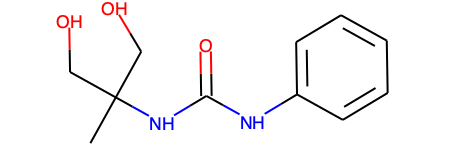

In [8]:
mol

We can see the different datatypes in the dataframe

In [9]:
datafile.dtypes

OSA_ID             object
Target             object
SMILES_parent      object
Name               object
InChiKey           object
PubChemCID          int64
VendorID           object
MW_parent         float64
Fragalysis_ref     object
Source             object
Status             object
Wiki link          object
dtype: object

## Adding structures to pandas dataframe

We can now convert the SMILES string to a RDKit molecular object for every row in the dataframe


In [10]:
PandasTools.AddMoleculeColumnToFrame(datafile,'SMILES_parent','Molecule',includeFingerprints=True)
>>> print([str(x) for x in  datafile.columns])

['OSA_ID', 'Target', 'SMILES_parent', 'Name', 'InChiKey', 'PubChemCID', 'VendorID', 'MW_parent', 'Fragalysis_ref', 'Source', 'Status', 'Wiki link', 'Molecule']


In [11]:
datafile.dtypes

OSA_ID             object
Target             object
SMILES_parent      object
Name               object
InChiKey           object
PubChemCID          int64
VendorID           object
MW_parent         float64
Fragalysis_ref     object
Source             object
Status             object
Wiki link          object
Molecule           object
dtype: object

If we view the dataframe the molecule object has been added to the last column. It would be better if the structure was more readily visible. So we change the column order.

OSA_ID Target                    SMILES_parent  \
0  OSA_000001   MurD         CN1CCN(CC1)c1ccc(cc1)C#N   
1  OSA_000002   MurD  CN1CCN(CC1)C(=O)NC1=CC=C(F)C=C1   
2  OSA_000003   MurD        CC(CO)(CO)NC(=O)Nc1ccccc1   

                                                Name  \
0             4-(4-methylpiperazin-1-yl)benzonitrile   
1  N-(4-fluorophenyl)-4-methylpiperazine-1-carbox...   
2  3-(1,3-dihydroxy-2-methylpropan-2-yl)-1-phenyl...   

                               InChiKey  PubChemCID     VendorID  MW_parent  \
0  InChIKey=ZSDPKKGOSKXEHN-UHFFFAOYSA-N      763205  Z2856434840    201.273   
1  InChiKey=MDBPFVSVLGYVCQ-UHFFFAOYSA-N      851986  Z2856434944    237.280   
2  InChiKey=NLGYHTMGWVQQIL-UHFFFAOYSA-N     4056614    Z57472297    224.260   

  Fragalysis_ref       Source      Status  \
0     MURD-x0349  FragLibrary  In Library   
1     MURD-x0373  FragLibrary  In Library   
2     MURD-x0374  FragLibrary  In Library   

                                           Wiki link  \
0  https://github.com/opensourceantibiotics/murli...   
1  https://github.com/opensourceantibiotics/murli...   
2  https://github.com/opensourceantibiotics/murli...   

                                            Molecule  
0  <img src="data:image/png;base64,iVBORw0KGgoAAA...  
1  <img src="data:image/png;base64,iVBORw0KGgoAAA...  
2  <img src="data:image/png;base64,iVBORw0KGgoAAA...
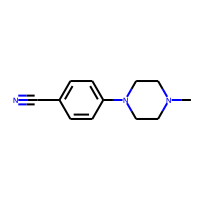
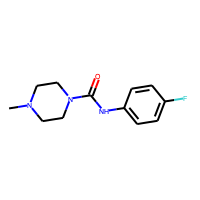
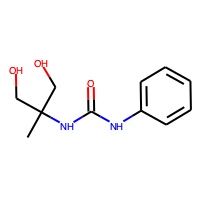

In [12]:
datafile.head(3)

In [13]:
#display the current order
cols = list(datafile.columns.values)
cols

['OSA_ID',
 'Target',
 'SMILES_parent',
 'Name',
 'InChiKey',
 'PubChemCID',
 'VendorID',
 'MW_parent',
 'Fragalysis_ref',
 'Source',
 'Status',
 'Wiki link',
 'Molecule']

In [14]:
#change the column order
datafile = datafile[['OSA_ID',
 'Molecule',
 'Target',
 'SMILES_parent',
 'Name',
 'InChiKey',
 'PubChemCID',
 'VendorID',
 'MW_parent',
 'Fragalysis_ref',
 'Source',
 'Status',
 'Wiki link']]

OSA_ID                                           Molecule Target  \
0  OSA_000001  <img src="data:image/png;base64,iVBORw0KGgoAAA...   MurD   
1  OSA_000002  <img src="data:image/png;base64,iVBORw0KGgoAAA...   MurD   
2  OSA_000003  <img src="data:image/png;base64,iVBORw0KGgoAAA...   MurD   

                     SMILES_parent  \
0         CN1CCN(CC1)c1ccc(cc1)C#N   
1  CN1CCN(CC1)C(=O)NC1=CC=C(F)C=C1   
2        CC(CO)(CO)NC(=O)Nc1ccccc1   

                                                Name  \
0             4-(4-methylpiperazin-1-yl)benzonitrile   
1  N-(4-fluorophenyl)-4-methylpiperazine-1-carbox...   
2  3-(1,3-dihydroxy-2-methylpropan-2-yl)-1-phenyl...   

                               InChiKey  PubChemCID     VendorID  MW_parent  \
0  InChIKey=ZSDPKKGOSKXEHN-UHFFFAOYSA-N      763205  Z2856434840    201.273   
1  InChiKey=MDBPFVSVLGYVCQ-UHFFFAOYSA-N      851986  Z2856434944    237.280   
2  InChiKey=NLGYHTMGWVQQIL-UHFFFAOYSA-N     4056614    Z57472297    224.260   

  Fragalysis_ref       Source      Status  \
0     MURD-x0349  FragLibrary  In Library   
1     MURD-x0373  FragLibrary  In Library   
2     MURD-x0374  FragLibrary  In Library   

                                           Wiki link  
0  https://github.com/opensourceantibiotics/murli...  
1  https://github.com/opensourceantibiotics/murli...  
2  https://github.com/opensourceantibiotics/murli...
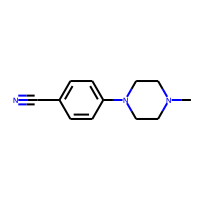
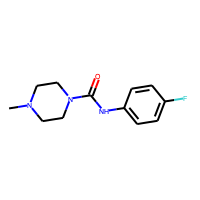
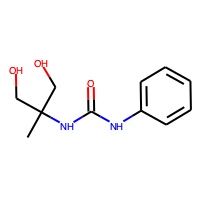

In [15]:
datafile.head(3)

If we want to view all structures we can diaplay them as a grid

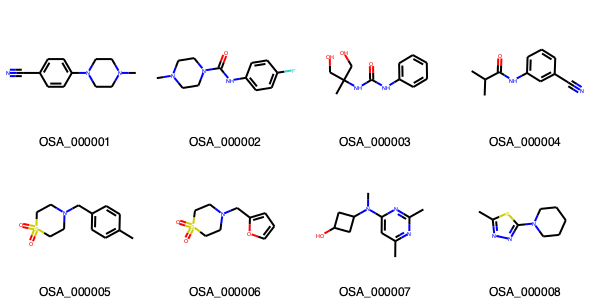

In [16]:
PandasTools.FrameToGridImage(datafile,column= 'Molecule', molsPerRow=4,subImgSize=(150,150),legendsCol="OSA_ID")

## Calculation of molecule properties

Now calculate a variety of properties using RDKit, adding them to the end of the dataframe. you can choose which properties to add here.

In [17]:
# Some of the availble descriptors are described here http://rdkit.org/docs/source/rdkit.Chem.rdMolDescriptors.html
from rdkit.Chem import rdMolDescriptors

In [18]:
hbdlist = [] #hydrogen bond donors
hbalist = [] #hydrogen bond acceptors
tpsalist = [] #Total polar surface area
mwtlist = [] #Exact molecular weight
logPlist = [] #Crippen LogP
mrlist = [] #Crippen MR
for mol in datafile['Molecule']:
    hbd = rdMolDescriptors.CalcNumHBD(mol)
    hbdlist.append(hbd)
    hba = rdMolDescriptors.CalcNumHBA(mol)
    hbalist.append(hba)
    TPSA = rdMolDescriptors.CalcTPSA(mol)
    tpsalist.append(TPSA)
    mwt = rdMolDescriptors.CalcExactMolWt(mol)
    mwtlist.append(mwt)
    crippen = rdMolDescriptors.CalcCrippenDescriptors(mol) #returns a 2-tuple with the Wildman-Crippen logp,mr values
    logPlist.append(crippen[0])#first is logP
    mrlist.append(crippen[1])#second is mr

In [19]:
#mrlist

We now add each of the properties to the dataframe

OSA_ID                                           Molecule Target  \
0  OSA_000001  <img src="data:image/png;base64,iVBORw0KGgoAAA...   MurD   
1  OSA_000002  <img src="data:image/png;base64,iVBORw0KGgoAAA...   MurD   
2  OSA_000003  <img src="data:image/png;base64,iVBORw0KGgoAAA...   MurD   

                     SMILES_parent  \
0         CN1CCN(CC1)c1ccc(cc1)C#N   
1  CN1CCN(CC1)C(=O)NC1=CC=C(F)C=C1   
2        CC(CO)(CO)NC(=O)Nc1ccccc1   

                                                Name  \
0             4-(4-methylpiperazin-1-yl)benzonitrile   
1  N-(4-fluorophenyl)-4-methylpiperazine-1-carbox...   
2  3-(1,3-dihydroxy-2-methylpropan-2-yl)-1-phenyl...   

                               InChiKey  PubChemCID     VendorID  MW_parent  \
0  InChIKey=ZSDPKKGOSKXEHN-UHFFFAOYSA-N      763205  Z2856434840    201.273   
1  InChiKey=MDBPFVSVLGYVCQ-UHFFFAOYSA-N      851986  Z2856434944    237.280   
2  InChiKey=NLGYHTMGWVQQIL-UHFFFAOYSA-N     4056614    Z57472297    224.260   

  Fragalysis_ref       Source      Status  \
0     MURD-x0349  FragLibrary  In Library   
1     MURD-x0373  FragLibrary  In Library   
2     MURD-x0374  FragLibrary  In Library   

                                           Wiki link  HBD  HBA   TPSA  \
0  https://github.com/opensourceantibiotics/murli...    0    3  30.27   
1  https://github.com/opensourceantibiotics/murli...    1    2  35.58   
2  https://github.com/opensourceantibiotics/murli...    4    3  81.59   

          MWt     LogP       MR  
0  201.126597  1.31008  60.8670  
1  237.127740  1.60500  64.4887  
2  224.116092  0.55140  61.1730
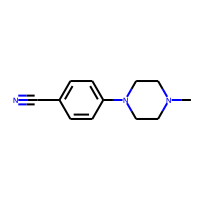
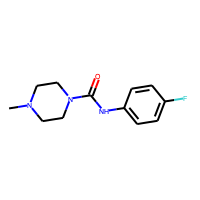
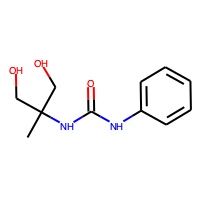

In [20]:
datafile['HBD']=hbdlist
datafile['HBA']=hbalist
datafile['TPSA']=tpsalist
datafile['MWt']=mwtlist
datafile['LogP']=logPlist
datafile['MR']=mrlist
datafile.head(3)

We can also add a molecular properties

In [21]:
datafile['NumHeavyAtoms']=datafile.apply(lambda x: x['Molecule'].GetNumHeavyAtoms(), axis=1)

OSA_ID                                           Molecule Target  \
0  OSA_000001  <img src="data:image/png;base64,iVBORw0KGgoAAA...   MurD   
1  OSA_000002  <img src="data:image/png;base64,iVBORw0KGgoAAA...   MurD   
2  OSA_000003  <img src="data:image/png;base64,iVBORw0KGgoAAA...   MurD   

                     SMILES_parent  \
0         CN1CCN(CC1)c1ccc(cc1)C#N   
1  CN1CCN(CC1)C(=O)NC1=CC=C(F)C=C1   
2        CC(CO)(CO)NC(=O)Nc1ccccc1   

                                                Name  \
0             4-(4-methylpiperazin-1-yl)benzonitrile   
1  N-(4-fluorophenyl)-4-methylpiperazine-1-carbox...   
2  3-(1,3-dihydroxy-2-methylpropan-2-yl)-1-phenyl...   

                               InChiKey  PubChemCID     VendorID  MW_parent  \
0  InChIKey=ZSDPKKGOSKXEHN-UHFFFAOYSA-N      763205  Z2856434840    201.273   
1  InChiKey=MDBPFVSVLGYVCQ-UHFFFAOYSA-N      851986  Z2856434944    237.280   
2  InChiKey=NLGYHTMGWVQQIL-UHFFFAOYSA-N     4056614    Z57472297    224.260   

  Fragalysis_ref       Source      Status  \
0     MURD-x0349  FragLibrary  In Library   
1     MURD-x0373  FragLibrary  In Library   
2     MURD-x0374  FragLibrary  In Library   

                                           Wiki link  HBD  HBA   TPSA  \
0  https://github.com/opensourceantibiotics/murli...    0    3  30.27   
1  https://github.com/opensourceantibiotics/murli...    1    2  35.58   
2  https://github.com/opensourceantibiotics/murli...    4    3  81.59   

          MWt     LogP       MR  NumHeavyAtoms  
0  201.126597  1.31008  60.8670             15  
1  237.127740  1.60500  64.4887             17  
2  224.116092  0.55140  61.1730             16
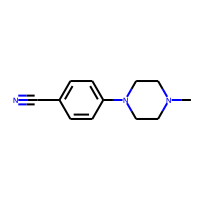
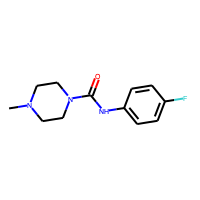
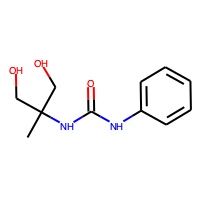

In [22]:
datafile.head(3)

## Plotting properties

We can using seaborn (http://seaborn.pydata.org/index.html) a Python visualization library based on matplotlib to generate a variety of plots.

In [23]:
import seaborn as sns

In [24]:
myTPSA = datafile['TPSA']
myMWt = datafile['MWt']

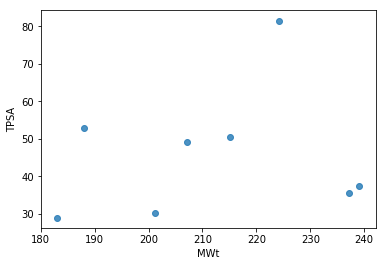

In [25]:
#Scatter plot
sns.regplot(myMWt, myTPSA, fit_reg=False)

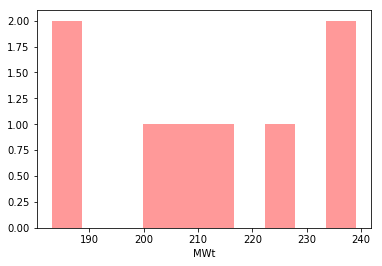

In [26]:
#bar chart
sns.distplot(myMWt, kde=False, color='red', bins =10)